In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.DataFrame(np.random.random([100,3]), columns = ['a','b','c'])
df

,a,b,c
0,0.026025,0.849803,0.128774
1,0.743624,0.061195,0.474594
2,0.139491,0.813937,0.580653
3,0.441718,0.530606,0.054621
4,0.096689,0.277999,0.958326
...,...,...,...
95,0.606751,0.190077,0.858723
96,0.327878,0.133975,0.700668
97,0.720627,0.441603,0.363540
98,0.044626,0.562980,0.976886


<AxesSubplot:>

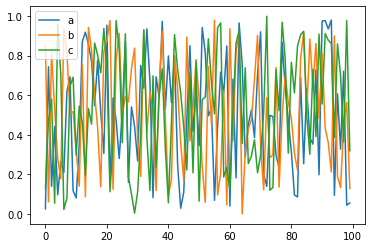

In [3]:
df.plot()

<AxesSubplot:xlabel='a'>

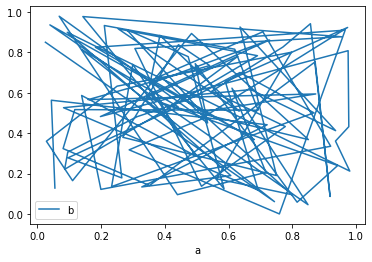

In [4]:
df.plot(x='a', y='b')

<AxesSubplot:xlabel='a'>

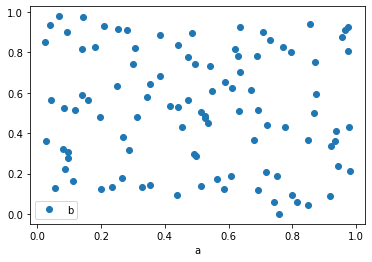

In [5]:
df.plot(x='a', y='b', marker = 'o', linestyle = '')

<AxesSubplot:xlabel='a'>

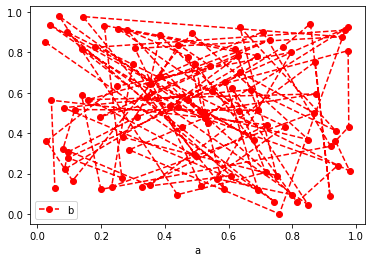

In [6]:
df.plot(x='a', y='b', marker = 'o', linestyle = '--', color='red')

<AxesSubplot:xlabel='a', ylabel='b'>

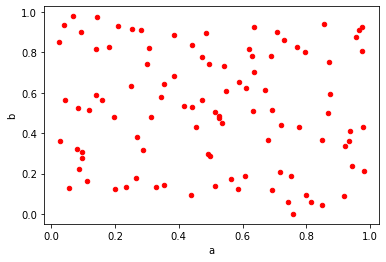

In [7]:
df.plot(x='a', y='b', marker = 'o', color='red', kind='scatter')

(<AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:ylabel='Frequency'>,
 <AxesSubplot:ylabel='Density'>)

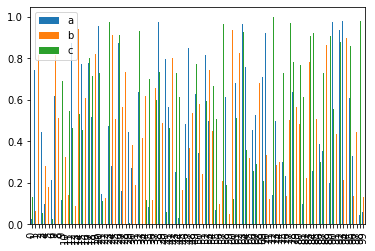

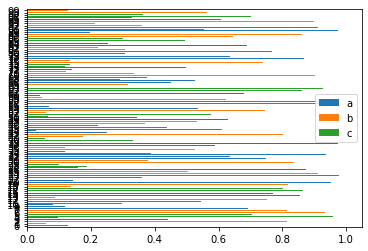

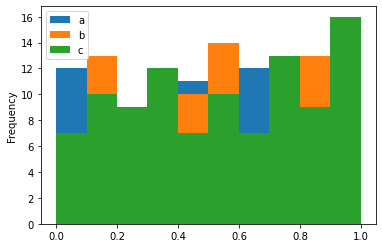

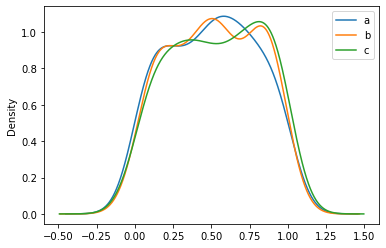

In [8]:

df.plot.bar() , df.plot.barh() , df.plot.hist(), df.plot.kde()

array([[<AxesSubplot:xlabel='a', ylabel='a'>,
        <AxesSubplot:xlabel='b', ylabel='a'>,
        <AxesSubplot:xlabel='c', ylabel='a'>],
       [<AxesSubplot:xlabel='a', ylabel='b'>,
        <AxesSubplot:xlabel='b', ylabel='b'>,
        <AxesSubplot:xlabel='c', ylabel='b'>],
       [<AxesSubplot:xlabel='a', ylabel='c'>,
        <AxesSubplot:xlabel='b', ylabel='c'>,
        <AxesSubplot:xlabel='c', ylabel='c'>]], dtype=object)

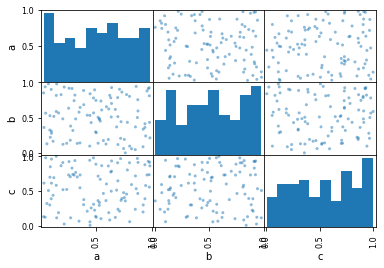

In [9]:
#useful for checking corellations
from pandas.plotting import scatter_matrix

scatter_matrix(df)

In [10]:
df6 = pd.DataFrame({
    'a': ['foo', 'bar']*3,
    'b': ['alpha']*2+['bravo']*2+['charlie']*2,
    'c': np.arange(10,70,10),
    'd': np.random.random(6)
}, index = list('ABCDEF'))

df6

,a,b,c,d
A,foo,alpha,10,0.257813
B,bar,alpha,20,0.745778
C,foo,bravo,30,0.450685
D,bar,bravo,40,0.922052
E,foo,charlie,50,0.655027
F,bar,charlie,60,0.601785


In [29]:
len(df6)

6

In [11]:
for key, group in df6.groupby('a'):
    print(key)
    print(group)

bar
     a        b   c         d
B  bar    alpha  20  0.745778
D  bar    bravo  40  0.922052
F  bar  charlie  60  0.601785
foo
     a        b   c         d
A  foo    alpha  10  0.257813
C  foo    bravo  30  0.450685
E  foo  charlie  50  0.655027


In [12]:
df6.groupby('a').groups

{'bar': ['B', 'D', 'F'], 'foo': ['A', 'C', 'E']}

In [13]:
df6.groupby('a')['c'].mean() 
#for column 'a' values with bar, the corresponding column 'c' values have a mean of 40
# for column 'a' values with foo, the corresponding column ''c'' values have a mean of 30

a
bar    40
foo    30
Name: c, dtype: int32

In [14]:
df6.groupby(['a','b'])['c'].mean() 

a    b      
bar  alpha      20
     bravo      40
     charlie    60
foo  alpha      10
     bravo      30
     charlie    50
Name: c, dtype: int32

In [15]:
df6.groupby(df6['b'].str[0]=='a')['c'].mean()
#keys here are True and False

b
False    45
True     15
Name: c, dtype: int32

In [16]:
def is_vowel(label):
    return label in 'AEIOU'

In [17]:
df6.groupby(is_vowel)['c'].mean()
#label variable here is the index
#grouping by indices that are vowel or not 

False    37.5
True     30.0
Name: c, dtype: float64

In [18]:
for key,value in df6.groupby(is_vowel):
    print(key)
    print(value)

False
     a        b   c         d
B  bar    alpha  20  0.745778
C  foo    bravo  30  0.450685
D  bar    bravo  40  0.922052
F  bar  charlie  60  0.601785
True
     a        b   c         d
A  foo    alpha  10  0.257813
E  foo  charlie  50  0.655027


In [19]:
df6.groupby(is_vowel).size()
# 4 rows have not vowel indices
# 2 rows have vowel indices

False    4
True     2
dtype: int64

In [20]:
df6.groupby(is_vowel).agg({'c':sum, 'd': np.mean})

,c,d
False,150,0.680075
True,60,0.456420


In [21]:
df6.groupby(is_vowel)['c'].apply(list)
#column 'c' values of non-vowel and vowel indices

False    [20, 30, 40, 60]
True             [10, 50]
Name: c, dtype: object

In [22]:
df6.groupby('a')['c'].transform(np.cumsum)

A     10
B     20
C     40
D     60
E     90
F    120
Name: c, dtype: int32

In [23]:
df6.groupby('a')['c'].transform(np.cumsum)

A     10
B     20
C     40
D     60
E     90
F    120
Name: c, dtype: int32

In [31]:
for k,v in df6.groupby('a')['c']:
    print(k)
    print(v.unique())

bar
[20 40 60]
foo
[10 30 50]
